
# Titanic classification Models 

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 

We'll be trying to predict a classification- survival or deceased.

## Import Libraries
importing some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train=pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot: >

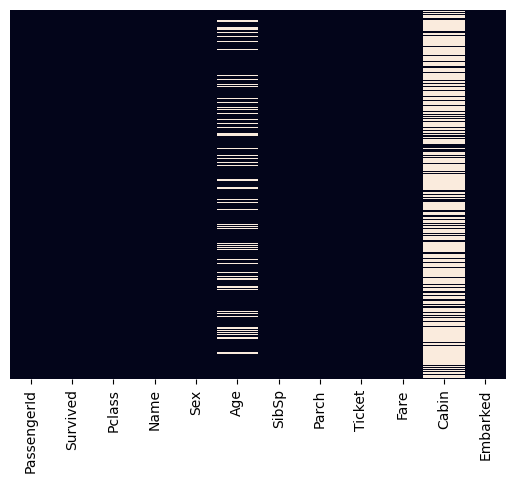

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='rocket')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, we have to drop it.

<AxesSubplot: xlabel='Survived', ylabel='count'>

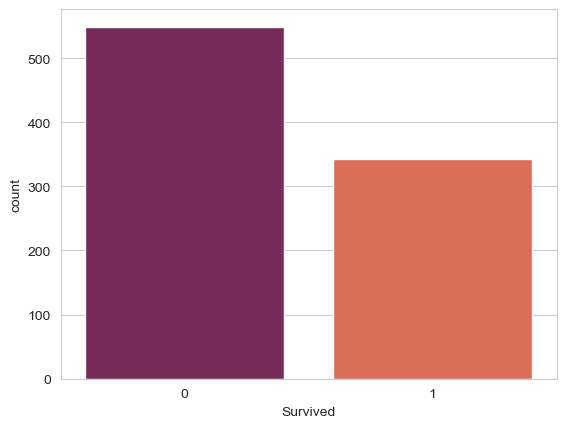

In [5]:
sns.set_style('whitegrid')
sns.countplot(train,x='Survived',palette='rocket')


<AxesSubplot: xlabel='Survived', ylabel='count'>

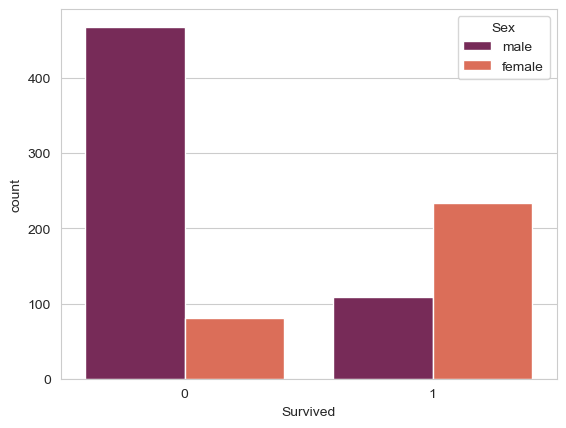

In [6]:
sns.countplot(train,x='Survived',hue='Sex',palette='rocket')


<AxesSubplot: xlabel='Survived', ylabel='count'>

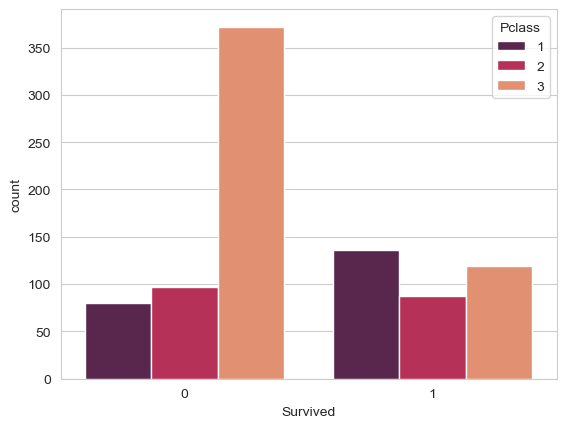

In [7]:
sns.countplot(train,x='Survived',hue='Pclass',palette='rocket')

<AxesSubplot: >

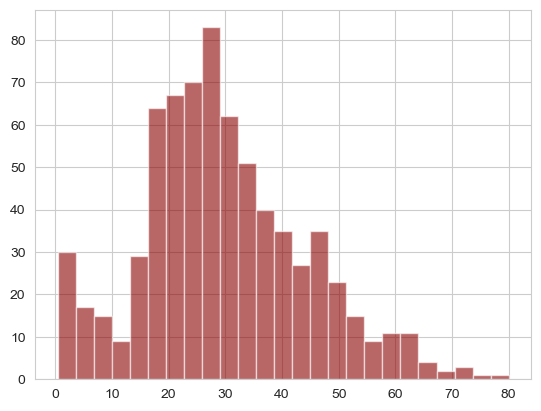

In [8]:
train['Age'].hist(bins=25, color='darkred',alpha=0.6)

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. 

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

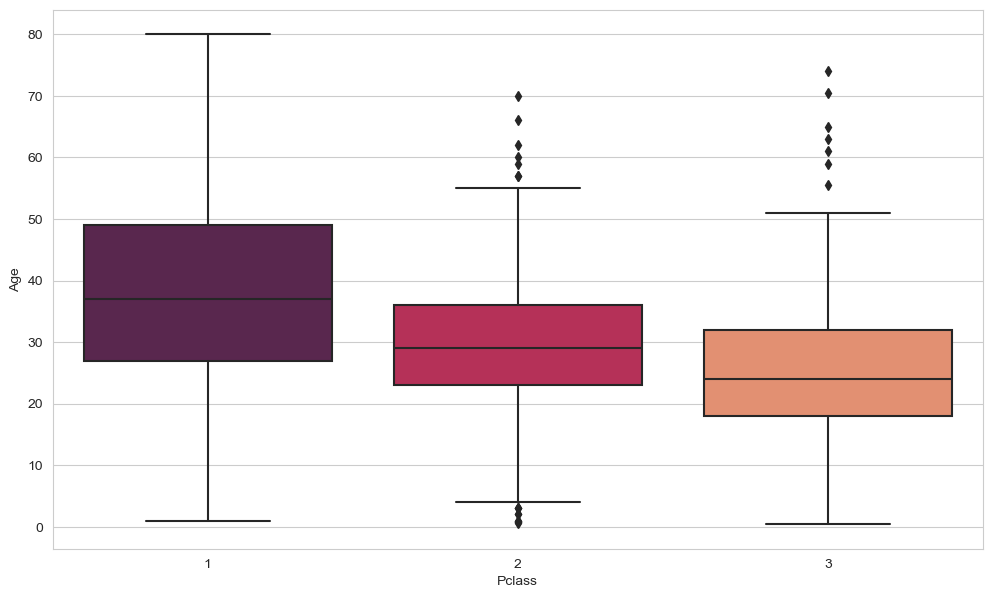

In [9]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=train, x='Pclass', y='Age',palette='rocket')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [10]:
def Age_imput(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

Now apply that function!

In [11]:
train['Age']=train[['Age','Pclass']].apply(Age_imput,axis=1)

Now let's check that heat map again!

<AxesSubplot: >

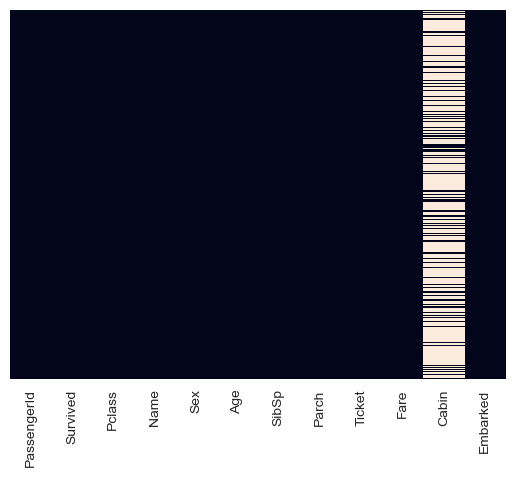

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='rocket')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [13]:
train.drop('Cabin',axis=1, inplace=True)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [17]:
Sex=pd.get_dummies(train['Sex'],drop_first=True)
Embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [18]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [19]:
train=pd.concat([train, Sex, Embarked],axis=1)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1



# Building Classification models

Let's start by splitting our data into a training set and test set.

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
 X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size=0.33, random_state=42)

## Training and Predicting
we are going to use different models and see which one performs better.

In [23]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)
LRPrediction=LR.predict(X_test)
from sklearn.metrics import classification_report, f1_score, confusion_matrix
print(classification_report(y_test,LRPrediction))
print(confusion_matrix(y_test,LRPrediction))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       184
           1       0.74      0.70      0.72       110

    accuracy                           0.80       294
   macro avg       0.78      0.78      0.78       294
weighted avg       0.79      0.80      0.79       294

[[157  27]
 [ 33  77]]


C:\Users\sepeh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now we are going to standard Scale data to see if the result would be better:

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train.drop('Survived',axis=1))
scaled_features = scaler.transform(train.drop('Survived',axis=1))
X_train, X_test, y_train, y_test = train_test_split(scaled_features,train['Survived'],test_size=0.30)
LR.fit(X_train,y_train)
LRPrediction=LR.predict(X_test)
from sklearn.metrics import classification_report, f1_score, confusion_matrix
print(classification_report(y_test,LRPrediction))
print(confusion_matrix(y_test,LRPrediction))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       169
           1       0.79      0.68      0.73        98

    accuracy                           0.82       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.82      0.81       267

[[151  18]
 [ 31  67]]


we saw a slight improvment now is time for checking other models.

First KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       169
           1       0.67      0.66      0.67        98

    accuracy                           0.76       267
   macro avg       0.74      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



C:\Users\sepeh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


lets find the best neighbors

In [26]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

C:\Users\sepeh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sepeh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\sepeh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sepeh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\sepeh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0, 0.5, 'Error Rate')

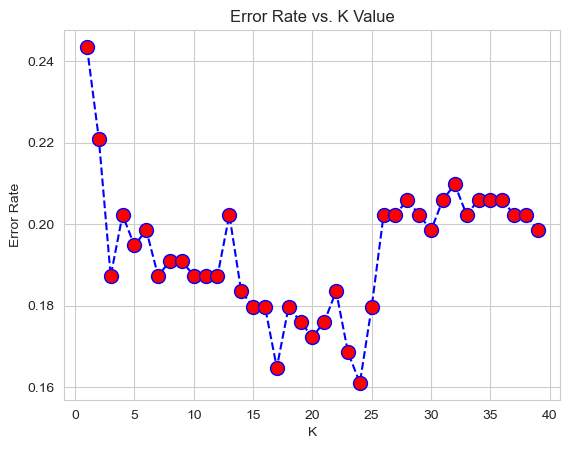

In [27]:
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

now evaluate the new KNN

In [28]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       169
           1       0.79      0.71      0.75        98

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267

[[150  19]
 [ 28  70]]


C:\Users\sepeh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Lest Use Random Forest Model 

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       169
           1       0.80      0.70      0.75        98

    accuracy                           0.83       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.83      0.83      0.83       267

[[152  17]
 [ 29  69]]


As we can see Random forest has the best performance